# Source
https://www.kaggle.com/c/titanic/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score

from sklearn.metrics import plot_roc_curve



In [2]:
train_df = pd.read_csv("train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

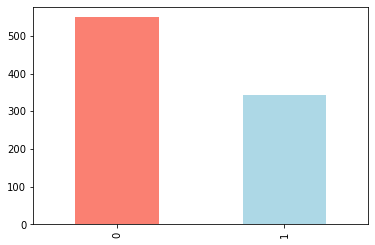

In [6]:
train_df["Survived"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [10]:
for label,content in train_df.items():
    if pd.api.types.is_string_dtype(content):
        print(label) 

Name
Sex
Ticket
Cabin
Embarked


# Converting object values in Categorical

In [11]:
for label,content in train_df.items():
    if pd.api.types.is_string_dtype(content):
        train_df[label] = content.astype("category").cat.as_ordered()

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 134.4 KB


In [13]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
for label,content in train_df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

PassengerId
Survived
Pclass
Age
SibSp
Parch
Fare


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 134.4 KB


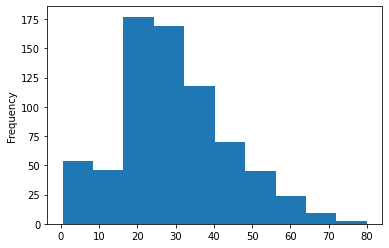

In [18]:
train_df["Age"].plot.hist();

In [21]:
# Fill numeric rows with median

for label,content in train_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            train_df[label+"_is_missing"]  = pd.isnull(content)
            train_df[label] = content.fillna(content.median())

In [22]:
train_df.isna().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Age_is_missing      0
dtype: int64

In [23]:
train_df["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: category
Categories (147, object): ['A10' < 'A14' < 'A16' < 'A19' ... 'F38' < 'F4' < 'G6' < 'T']

In [24]:
train_df["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: category
Categories (3, object): ['C' < 'Q' < 'S']

In [26]:
train_df = train_df.drop("Name",axis=1)

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     891 non-null    int64   
 1   Survived        891 non-null    int64   
 2   Pclass          891 non-null    int64   
 3   Sex             891 non-null    category
 4   Age             891 non-null    float64 
 5   SibSp           891 non-null    int64   
 6   Parch           891 non-null    int64   
 7   Ticket          891 non-null    category
 8   Fare            891 non-null    float64 
 9   Cabin           204 non-null    category
 10  Embarked        889 non-null    category
 11  Age_is_missing  891 non-null    bool    
dtypes: bool(1), category(4), float64(2), int64(5)
memory usage: 86.6 KB


In [28]:
for label,content in train_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        train_df[label+"_is_missing"] = pd.isnull(content)
        train_df[label] = pd.Categorical(content).codes+1

In [29]:
train_df.isna().sum()

PassengerId            0
Survived               0
Pclass                 0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
Age_is_missing         0
Sex_is_missing         0
Ticket_is_missing      0
Cabin_is_missing       0
Embarked_is_missing    0
dtype: int64

In [31]:
train_df["Sex"]

0      2
1      1
2      1
3      1
4      2
      ..
886    2
887    1
888    1
889    2
890    2
Name: Sex, Length: 891, dtype: int8

In [32]:
pd.crosstab(train_df["Survived"],train_df["Sex"])

Sex,1,2
Survived,,
0,81,468
1,233,109


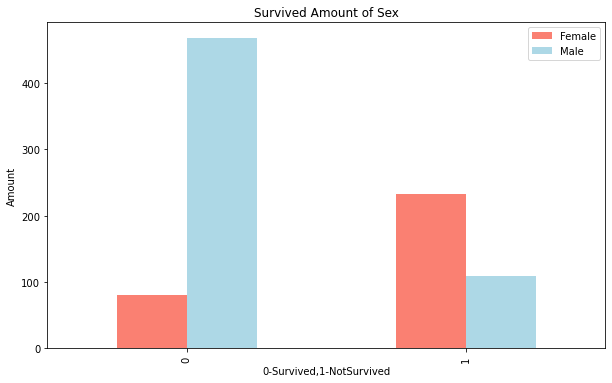

In [33]:
pd.crosstab(train_df["Survived"],train_df["Sex"]).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Survived Amount of Sex")
plt.xlabel("0-Survived,1-NotSurvived")
plt.ylabel("Amount")
plt.legend(["Female","Male"]);


In [34]:
train_df.corr(
)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_is_missing,Sex_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing
PassengerId,1.000000e+00,-0.005007,-0.035144,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.000637,0.012985,-0.020167,NaN,NaN,-0.019919,6.756184e-19
Survived,-5.006661e-03,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,0.276235,-0.176509,-0.092197,NaN,NaN,-0.316912,6.009485e-02
Pclass,-3.514399e-02,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,-0.537419,0.173511,0.172933,NaN,NaN,0.725541,-7.428233e-02
Sex,4.293888e-02,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,-0.137704,0.118492,0.055215,NaN,NaN,0.140391,-6.429648e-02
Age,3.421211e-02,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,0.164550,-0.031903,-0.052098,NaN,NaN,-0.240314,7.522869e-02
SibSp,-5.752683e-02,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,-0.024829,0.071480,0.018958,NaN,NaN,0.040460,-2.250825e-02
Parch,-1.652012e-03,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,0.033585,0.043351,-0.124104,NaN,NaN,-0.036987,-2.246691e-02
Ticket,-5.655365e-02,-0.164549,0.319869,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,-0.176515,0.011146,0.031241,NaN,NaN,0.249303,-7.242787e-02
Fare,1.265822e-02,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,0.310987,-0.230365,-0.100707,NaN,NaN,-0.482075,4.564557e-02
Cabin,-6.371446e-04,0.276235,-0.537419,-0.137704,0.164550,-0.024829,0.033585,-0.176515,0.310987,1.000000,-0.070245,-0.130797,NaN,NaN,-0.848723,5.438031e-03


In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          891 non-null    int64  
 1   Survived             891 non-null    int64  
 2   Pclass               891 non-null    int64  
 3   Sex                  891 non-null    int8   
 4   Age                  891 non-null    float64
 5   SibSp                891 non-null    int64  
 6   Parch                891 non-null    int64  
 7   Ticket               891 non-null    int16  
 8   Fare                 891 non-null    float64
 9   Cabin                891 non-null    int16  
 10  Embarked             891 non-null    int8   
 11  Age_is_missing       891 non-null    bool   
 12  Sex_is_missing       891 non-null    bool   
 13  Ticket_is_missing    891 non-null    bool   
 14  Cabin_is_missing     891 non-null    bool   
 15  Embarked_is_missing  891 non-null    boo

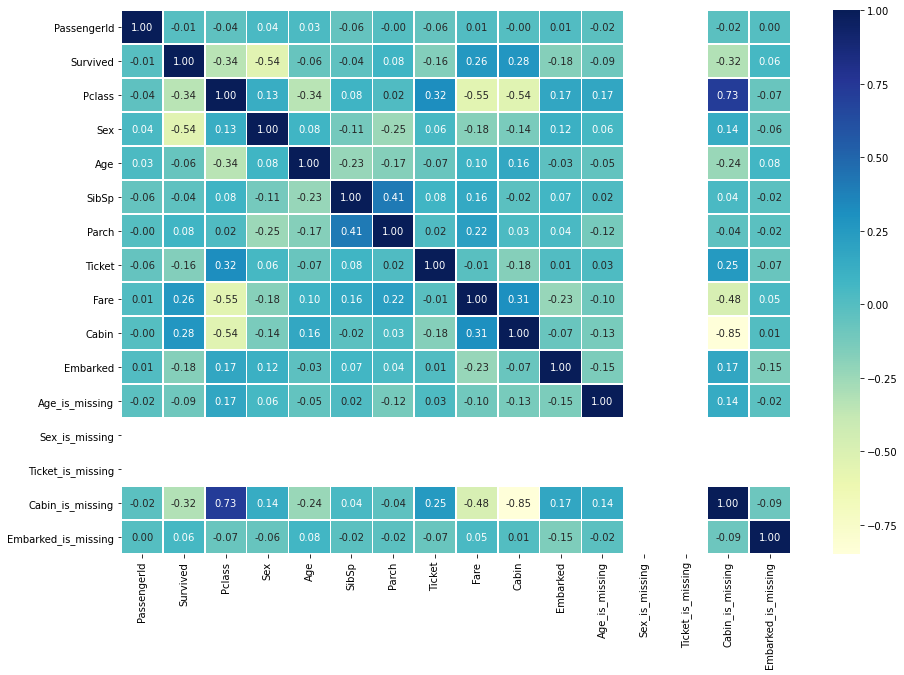

In [36]:
corr_matrix = train_df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu");

# Modeling

In [37]:
np.random.seed(42)

X_train = train_df.drop("Survived",axis=1)
y_train = train_df["Survived"]

In [39]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [41]:
test_df = pd.read_csv("test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [58]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_is_missing,Sex_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing
0,1,0,3,2,22.0,1,0,524,7.2500,0,3,False,False,False,True,False
1,2,1,1,1,38.0,1,0,597,71.2833,82,1,False,False,False,False,False
2,3,1,3,1,26.0,0,0,670,7.9250,0,3,False,False,False,True,False
3,4,1,1,1,35.0,1,0,50,53.1000,56,3,False,False,False,False,False
4,5,0,3,2,35.0,0,0,473,8.0500,0,3,False,False,False,True,False


In [42]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [44]:
test_df.drop("Name",axis=1,inplace=True)

In [47]:
for label,content in test_df.items():
    if pd.api.types.is_string_dtype(content):
        test_df[label] = content.astype("category").cat.as_ordered()

In [48]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    category
 3   Age          332 non-null    float64 
 4   SibSp        418 non-null    int64   
 5   Parch        418 non-null    int64   
 6   Ticket       418 non-null    category
 7   Fare         417 non-null    float64 
 8   Cabin        91 non-null     category
 9   Embarked     418 non-null    category
dtypes: category(4), float64(2), int64(4)
memory usage: 37.9 KB


In [49]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PassengerId          891 non-null    int64  
 1   Survived             891 non-null    int64  
 2   Pclass               891 non-null    int64  
 3   Sex                  891 non-null    int8   
 4   Age                  891 non-null    float64
 5   SibSp                891 non-null    int64  
 6   Parch                891 non-null    int64  
 7   Ticket               891 non-null    int16  
 8   Fare                 891 non-null    float64
 9   Cabin                891 non-null    int16  
 10  Embarked             891 non-null    int8   
 11  Age_is_missing       891 non-null    bool   
 12  Sex_is_missing       891 non-null    bool   
 13  Ticket_is_missing    891 non-null    bool   
 14  Cabin_is_missing     891 non-null    bool   
 15  Embarked_is_missing  891 non-null    boo

In [50]:
for label,content in test_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            test_df[label+"_is_missing"]  = pd.isnull(content)
            test_df[label] = content.fillna(content.median())

In [51]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      418 non-null    int64   
 1   Pclass           418 non-null    int64   
 2   Sex              418 non-null    category
 3   Age              418 non-null    float64 
 4   SibSp            418 non-null    int64   
 5   Parch            418 non-null    int64   
 6   Ticket           418 non-null    category
 7   Fare             418 non-null    float64 
 8   Cabin            91 non-null     category
 9   Embarked         418 non-null    category
 10  Age_is_missing   418 non-null    bool    
 11  Fare_is_missing  418 non-null    bool    
dtypes: bool(2), category(4), float64(2), int64(4)
memory usage: 38.7 KB


In [52]:
for label,content in test_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        test_df[label+"_is_missing"] = pd.isnull(content)
        test_df[label] = pd.Categorical(content).codes+1

In [53]:
test_df.isna().sum()

PassengerId            0
Pclass                 0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
Age_is_missing         0
Fare_is_missing        0
Sex_is_missing         0
Ticket_is_missing      0
Cabin_is_missing       0
Embarked_is_missing    0
dtype: int64

ValueError: Number of features of the model must match the input. Model n_features is 15 and input n_features is 16 

In [55]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_is_missing,Sex_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing
0,1,3,2,22.0,1,0,524,7.2500,0,3,False,False,False,True,False
1,2,1,1,38.0,1,0,597,71.2833,82,1,False,False,False,False,False
2,3,3,1,26.0,0,0,670,7.9250,0,3,False,False,False,True,False
3,4,1,1,35.0,1,0,50,53.1000,56,3,False,False,False,False,False
4,5,3,2,35.0,0,0,473,8.0500,0,3,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,2,27.0,0,0,102,13.0000,0,3,False,False,False,True,False
887,888,1,1,19.0,0,0,15,30.0000,31,3,False,False,False,False,False
888,889,3,1,28.0,1,2,676,23.4500,0,3,True,False,False,True,False
889,890,1,2,26.0,0,0,9,30.0000,61,1,False,False,False,False,False


In [60]:
test_df.drop("Fare_is_missing",inplace=True,axis=1)

In [61]:
model.predict(test_df)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [62]:
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])


In [66]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Pclass  418 non-null    int64
 1   Sex     418 non-null    int8 
 2   SibSp   418 non-null    int64
 3   Parch   418 non-null    int64
dtypes: int64(3), int8(1)
memory usage: 10.3 KB


In [67]:
y = train_df["Survived"]


In [68]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

In [69]:
output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})

In [72]:
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [71]:
result_given = pd.read_csv("gender_submission.csv")
result_given.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [75]:
y_preds = predictions

In [76]:
y_preds

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [78]:
y_test = result_given["Survived"]
len(y_test),len(y_preds)

(418, 418)

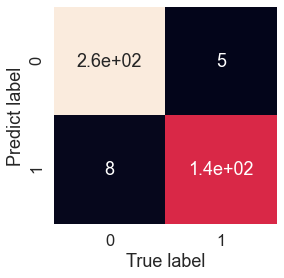

In [85]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    fig, ax = plt.subplots(figsize=(4,4))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predict label")
    
plot_conf_mat(y_test,y_preds)   

In [80]:
confusion_matrix(y_test,y_preds)

array([[261,   5],
       [  8, 144]], dtype=int64)

In [88]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       266
           1       0.97      0.95      0.96       152

    accuracy                           0.97       418
   macro avg       0.97      0.96      0.97       418
weighted avg       0.97      0.97      0.97       418



In [89]:
model.score(X_test,y_test)

0.9688995215311005

In [90]:
output.to_csv('final_submission.csv', index=False)